In [55]:
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [66]:
# hyper parameters
epoch_num = 15
batch_size = 50
learning_rate = 1e-3

In [57]:
train_dataset = torchvision.datasets.CIFAR10(root='../data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.CIFAR10(root='../data', train=False, download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [58]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [59]:
class Conv(nn.Module):
    def __init__(self, class_num=10):
        super(Conv, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.linear = nn.Linear(8 * 8 * 32, class_num)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)

        return self.linear(out)


In [60]:
model = Conv(10)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [67]:
loss_list = []
with tqdm(total=epoch_num * len(train_loader)) as pbar:
    for e in range(epoch_num):
        for i, (pic, label) in enumerate(train_loader):
            output = model(pic)
            loss = criterion(output, label)
            if (i + 1) % 100 == 0:
                loss_list.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            pbar.update(1)

  0%|          | 0/15000 [00:00<?, ?it/s]

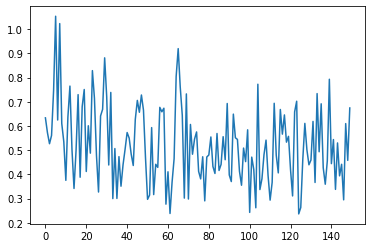

In [68]:
plt.plot(loss_list)